# Import Libraries

In [67]:
import pandas as pd
import seaborn as sns
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate, KFold
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

# Data Load

In [68]:
# Loading all data relation with movie ratings
import surprise
item_rating = pd.read_csv(r'C:\Users\smmanrrique\3D Objects\unizar\magvd_imdb\miscelaneos\learning-from-sets-2019\item_ratings.csv')
set_ratings = pd.read_csv(r'C:\Users\smmanrrique\3D Objects\unizar\magvd_imdb\miscelaneos\learning-from-sets-2019\set_ratings.csv')
movies = pd.read_csv(r'C:\Users\smmanrrique\3D Objects\unizar\magvd_imdb\miscelaneos\ml-25m\movies.csv')

In [69]:
# Show data in dataframes
item_rating
set_ratings
# movies

,userId,movieId_1,movieId_2,movieId_3,movieId_4,movieId_5,rating,timestamp
0,7fdcecb392,1265,2628,6299,82459,134853,4.0,2016-03-12 22:10:24
1,7fdcecb392,1405,3301,4368,73060,128918,2.0,2016-03-12 22:10:42
2,7fdcecb392,165,1082,4745,5999,58661,3.0,2016-03-12 22:10:53
3,7fdcecb392,1258,1393,4963,33615,86345,4.0,2016-03-12 22:11:02
4,7fdcecb392,1422,3020,5445,8464,65802,3.0,2016-03-12 22:11:11
...,...,...,...,...,...,...,...,...
29511,41e3b8ebbc,1291,2431,3928,4865,78893,4.0,2016-03-07 04:04:16
29512,41e3b8ebbc,830,2118,3317,6535,44397,3.5,2016-03-07 04:04:22
29513,41e3b8ebbc,446,1391,2947,6266,110968,3.5,2016-03-07 04:04:29
29514,41e3b8ebbc,53460,66365,71579,82169,88163,3.0,2016-03-07 04:04:38


# Data creation

In [70]:
# Merge all info in one dataframe
general_info = pd.merge(item_rating, movies, on='movieId')
general_info


,userId,movieId,rating,timestamp,title,genres
0,39032b0f7a,1,3.0,1997-11-06 06:36:16,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,adc34e8c1b,1,3.0,1997-11-29 17:31:04,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,e9f9759020,1,4.0,2015-09-23 21:34:40,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,d6dc47fa4c,1,4.0,1999-06-17 03:38:25,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,5efaf0ea51,1,4.5,2004-02-27 22:04:53,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
452854,ca1dcaf62a,142452,4.0,2016-02-23 12:32:48,Puella Magi Madoka Magica the Movie Part II: E...,Action|Animation|Horror|Mystery
452855,ca1dcaf62a,148374,4.5,2016-02-24 09:57:08,Cosmos (2015),Drama
452856,ca1dcaf62a,153957,5.0,2016-02-25 19:29:05,The Dark Side Of Chocolate (2010),Documentary|Drama
452857,5498613177,154051,4.0,2016-02-28 11:57:47,The Last Man on the Moon (2016),Documentary|Drama


In [71]:
# Getting rating mean and number of votos by movie
movie_inf = ( general_info.groupby('movieId')\
    .agg(rating_mean= ('rating','mean'), votos= ('rating','count') )\
    .sort_values(['votos','rating_mean'], ascending=False))

movie_inf



,rating_mean,votos
movieId,,
2571,4.146575,730
79132,4.097139,664
356,3.935115,655
318,4.329755,652
4993,4.028549,648
...,...,...
152348,0.500000,1
152358,0.500000,1
152360,0.500000,1


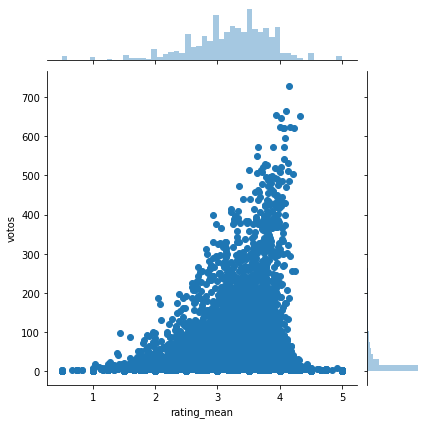

In [72]:
# Using seaborn to get data concentration of all data
sns.jointplot(x='rating_mean', y='votos', data=movie_inf)

# Using seaborn to get data concentration of votos more than 100
# sns.jointplot(x='rating_mean', y='votos', data=movie_inf.where(movie_inf['votos'] > 100))

In [73]:
# Getting rating mean and number of votos by user
user_inf = ( general_info.groupby('userId')\
    .agg(rating_mean= ('rating','mean'), votos= ('rating','count') )\
    .sort_values(['votos','rating_mean'], ascending=False))

user_inf


,rating_mean,votos
userId,,
b986438d3c,2.540392,4184
d6dc47fa4c,3.179101,3847
f87af9e2d7,3.000972,3602
1d4a231eb8,2.636725,3145
6fec92c8a0,2.777660,2820
...,...,...
15cc652336,4.241379,29
6c51ee932f,3.672414,29
e900e40bb5,3.660714,28


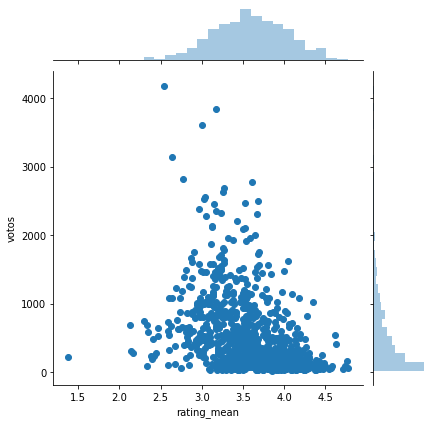

In [74]:
# Using seaborn to get data concentration of all data
sns.jointplot(x='rating_mean', y='votos', data=user_inf)


# Creating a recommendation model  using *Surprise Package*

In [75]:
# Defining reader with rating scale 1-5
reader  = Reader(rating_scale=(1,5))

# Set dataframe with userId, movieId, rating  columns in that order
load_data = Dataset.load_from_df(general_info[['userId', 'movieId', 'rating']], reader )

# Creating anti-set that it will use to recommendations
anti_set = load_data.build_full_trainset().build_anti_testset()

In [76]:
# Var to save algorithm results
results = []

# Iterate over selected algorithms to get best between them
for algorithm in [NormalPredictor(), SVD(), KNNBaseline()]:

    # Perform cross validation
    result = cross_validate(algorithm, load_data, measures=['RMSE'], cv=3, verbose=False)

    # Get result & append algorithm name
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    results.append(tmp)

# Show algorithm results
pd.DataFrame(results).set_index('Algorithm').sort_values('test_rmse')


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.794592,17.125958,1.381032
KNNBaseline,0.801739,3.119504,25.841038
NormalPredictor,1.363429,0.557077,1.449208


In [77]:
def model(n_splits, algo, best_rmse, data ):
    kf = KFold(n_splits)
    best_algo = None
    best_pred = None
    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        prediction = algo.test(testset)

        # Compute and print Root Mean Squared Error
        rmse = accuracy.rmse(prediction, verbose=True)

        if rmse < best_rmse:
            best_rmse = rmse
            best_algo = algo
            best_pred = prediction

    return  best_rmse, best_algo, best_pred


In [78]:
kf = KFold(n_splits=3)
algo = KNNBaseline(k=3)
rmse, algorithm, prediction = model(3, algo, 1000, load_data)
pilot = pd.DataFrame(prediction).merge(general_info , left_on = ['uid', 'iid'], right_on = ['userId', 'movieId'])
first_approach = pilot[['uid', 'iid', 'userId', 'title', 'movieId', 'est','rating']].sort_values('userId', ascending=False)

first_approach

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8480
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8504
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8496


KeyError: "['userName', 'movieName'] not in index"

,uid,iid,userId,title,movieId,est,rating
133391,ffc2856f40,33639,ffc2856f40,Mad Hot Ballroom (2005),33639,4.285161,4.0
56759,ffc2856f40,39292,ffc2856f40,"Good Night, and Good Luck. (2005)",39292,4.001039,4.5
6233,ffc2856f40,56782,ffc2856f40,There Will Be Blood (2007),56782,4.203691,4.5
56951,ffc2856f40,3426,ffc2856f40,Jungle Fever (1991),3426,3.553306,3.5
72020,ffc2856f40,4973,ffc2856f40,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4973,4.126065,5.0
...,...,...,...,...,...,...,...
17007,0011a9baea,105213,0011a9baea,Don Jon (2013),105213,3.793143,3.0
142329,0011a9baea,1210,0011a9baea,Star Wars: Episode VI - Return of the Jedi (1983),1210,4.361754,5.0
52510,0011a9baea,4014,0011a9baea,Chocolat (2000),4014,3.259283,5.0
96102,0011a9baea,45722,0011a9baea,Pirates of the Caribbean: Dead Man's Chest (2006),45722,4.568937,3.5
